# Discrete Choice Modeling (Conjoint) R - Market Research
## Simulated Data for Generic SmartPhone


**Design**  
* Full Factorial Design  
* Four Factors: Size, Resolution, CPU_GPU, Price
* Respondents: 300


In [67]:
#Load Synthetic Data
options(warn=-1)
setwd("C:/Users/Remote2/OneDrive/Data Science/R Data/Conjoint/Syth Cojoint")
load('C:/Users/Remote2/OneDrive/Data Science/R Data/Conjoint/Syth Cojoint/synthconj.RData')

In [68]:
#Display Factor Data
head(factor)

$Size
[1] "5"   "5.7" "6.7"

$Resolution
[1] "1080P" "4K"   

$CPU_GPU
[1] "Low"  "Med"  "High"

$price
[1] "500" "700" "900"

In [89]:
#Dsiplay profiles. There are a total of 54 profiles with the first 6 shown below.
head(profiles)

Size,Resolution,CPU_GPU,price
<fct>,<fct>,<fct>,<fct>
5,1080P,Low,500
5.7,1080P,Low,500
6.7,1080P,Low,500
5,4K,Low,500
5.7,4K,Low,500
6.7,4K,Low,500


In [70]:
#Display user choice data.
head(conj.df)

,resp.id,ques,alt,use_work,Size,Resolution,CPU_GPU,price,choice
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
2,1,1,1,yes,5.7,1080P,Low,500,0
18,1,1,2,yes,6.7,4K,High,500,1
34,1,1,3,yes,5,4K,High,700,0
33,1,2,1,yes,6.7,1080P,High,700,1
24,1,2,2,yes,6.7,4K,Low,700,0
31,1,2,3,yes,5,1080P,High,700,0


In [97]:
###ANALYSIS###

summary(conj.df)

    resp.id            ques         alt    use_work    Size      Resolution  
 Min.   :  1.00   Min.   : 1   Min.   :1   yes:4140   5  :4492   1080P:6723  
 1st Qu.: 75.75   1st Qu.: 4   1st Qu.:1   no :9360   5.7:4518   4K   :6777  
 Median :150.50   Median : 8   Median :2              6.7:4490               
 Mean   :150.50   Mean   : 8   Mean   :2                                     
 3rd Qu.:225.25   3rd Qu.:12   3rd Qu.:3                                     
 Max.   :300.00   Max.   :15   Max.   :3                                     
 CPU_GPU     price          choice      
 Low :4496   500:4506   Min.   :0.0000  
 Med :4495   700:4479   1st Qu.:0.0000  
 High:4509   900:4515   Median :0.0000  
                        Mean   :0.3333  
                        3rd Qu.:1.0000  
                        Max.   :1.0000  

#### Analysis  

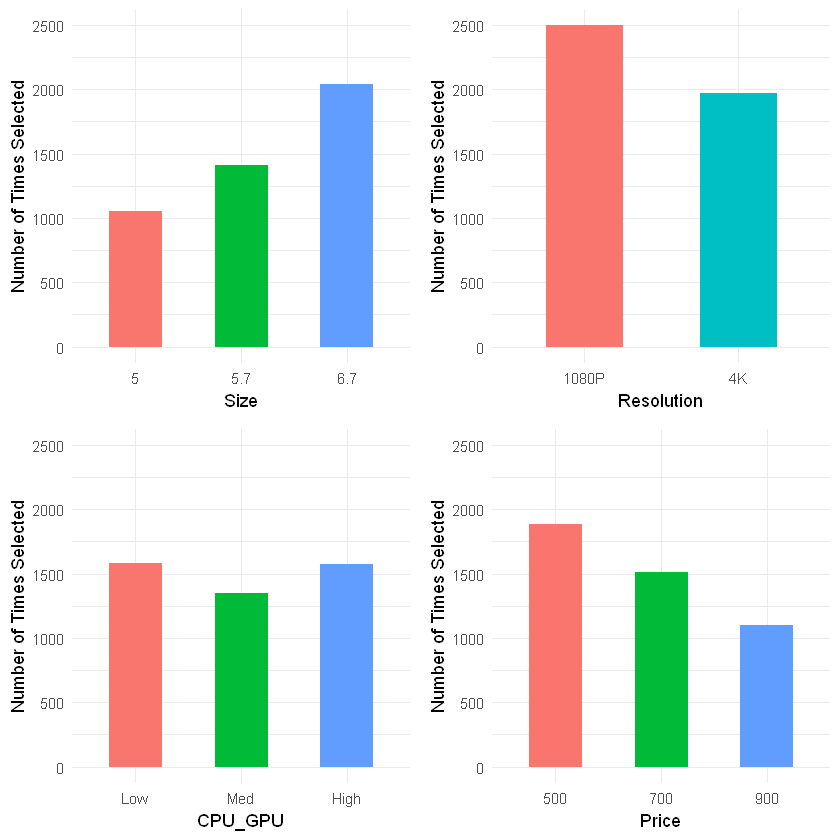

In [113]:
#install.packages('cowplot')
library(ggplot2)
library(cowplot)
p1 = ggplot(data=conj.df) + geom_bar(aes(x=Size, y = choice, fill = Size), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")
p2 = ggplot(data=conj.df) + geom_bar(aes(x=Resolution, y = choice, fill = Resolution), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")
p3 = ggplot(data=conj.df) + geom_bar(aes(x=CPU_GPU, y = choice, fill = CPU_GPU), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")
p4 = ggplot(data=conj.df) + geom_bar(aes(x=price, y = choice, fill = price), stat="identity",
                                     width=0.5) + ylab("Number of Times Selected") + xlab('Price') + ylim(0, 2500) + theme_minimal() + theme(legend.position="none")

plot_grid(p1, p2, p3, p4, labels="", align="v")

#### Analysis


In [73]:
#install.packages('mlogit')
#Run the conjoint analysis
library(mlogit)
conj.mlogit <- mlogit.data(data=conj.df, choice="choice", shape="long",
                            varying=3:6, alt.levels=paste("pos",1:3),
                            id.var="resp.id")

m1 <- mlogit(choice ~ 0 + Size  + Resolution  + CPU_GPU + price, data = conj.mlogit)
summary(m1)
#The Estimate lists the mean values for each level; these must be interpreted
#relative to the base levels of each factorute.


Call:
mlogit(formula = choice ~ 0 + Size + Resolution + CPU_GPU + price, 
    data = conj.mlogit, method = "nr")

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.33711 0.34089 0.32200 

nr method
4 iterations, 0h:0m:0s 
g'(-H)^-1g = 0.00563 
successive function values within tolerance limits 

Coefficients :
               Estimate Std. Error  z-value  Pr(>|z|)    
Size5.7       0.4130695  0.0490438   8.4225 < 2.2e-16 ***
Size6.7       1.0541816  0.0487020  21.6455 < 2.2e-16 ***
Resolution4K -0.4114089  0.0381790 -10.7758 < 2.2e-16 ***
CPU_GPUMed   -0.2433099  0.0471399  -5.1614 2.451e-07 ***
CPU_GPUHigh   0.0056961  0.0461891   0.1233    0.9019    
price700     -0.3821829  0.0458116  -8.3425 < 2.2e-16 ***
price900     -0.8606885  0.0485738 -17.7192 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log-Likelihood: -4454.8

#### Analysis  

In [79]:
#Treating price as a numberic number rather than a factor
m2 <- mlogit(choice ~ 0 + Size  + Resolution  + CPU_GPU + as.numeric(as.character(price))
             , data = conj.mlogit)
summary(m2)


Call:
mlogit(formula = choice ~ 0 + Size + Resolution + CPU_GPU + as.numeric(as.character(price)), 
    data = conj.mlogit, method = "nr")

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.33711 0.34089 0.32200 

nr method
4 iterations, 0h:0m:0s 
g'(-H)^-1g = 0.00448 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Size5.7                          0.4130394  0.0490404   8.4224 < 2.2e-16 ***
Size6.7                          1.0542685  0.0486893  21.6530 < 2.2e-16 ***
Resolution4K                    -0.4109172  0.0381732 -10.7645 < 2.2e-16 ***
CPU_GPUMed                      -0.2430221  0.0471440  -5.1549 2.538e-07 ***
CPU_GPUHigh                      0.0060529  0.0461823   0.1311    0.8957    
as.numeric(as.character(price)) -0.0021414  0.0001208 -17.7265 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log-Likelihood: -4455.5

In [80]:
#test how the models fits
lrtest(m1, m2)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,-4454.808,NA,NA,NA
6,-4455.508,-1,1.400116,0.2367042


#### Analysis  

In [119]:
#Predicting Choice Share

predict.mnl <- function(model, data) {
  # Function for predicting shares from a multinomial logit model
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to
  # predict shares. Same format as the data used to estimate model.
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[,-1]
  utility <- data.model%*%model$coef
  share <- exp(utility)/sum(exp(utility))
  cbind(share, data)
}

#Create a new set of design then pass to the predict model
new.data <- expand.grid(factor)[c(8, 1, 3, 41, 49, 26), ]

#Simulating Choice Shares
predict.mnl(m2, new.data)

,share,Size,Resolution,CPU_GPU,price
,<dbl>,<fct>,<fct>,<fct>,<fct>
8,0.17743609,5.7,1080P,Med,500
1,0.14969399,5,1080P,Low,500
3,0.42960304,6.7,1080P,Low,500
41,0.06369719,5.7,4K,Low,900
49,0.06394806,5,1080P,High,900
26,0.11562163,5.7,1080P,Med,700


#### Analysis  

In [77]:
#Share Predictions for Identical Alternatives
new.data.2 <- expand.grid(factor)[c(8, 8, 1, 3, 41, 49, 26), ]
predict.mnl(m1, new.data.2)

,share,Size,Resolution,CPU_GPU,price
,<dbl>,<fct>,<fct>,<fct>,<fct>
8,0.15005670,5.7,1080P,Med,500
8.1,0.15005670,5.7,1080P,Med,500
1,0.12662799,5,1080P,Low,500
3,0.36337494,6.7,1080P,Low,500
41,0.05363628,5.7,4K,Low,900
49,0.05385317,5,1080P,High,900
26,0.10239423,5.7,1080P,Med,700


#### Analysis  

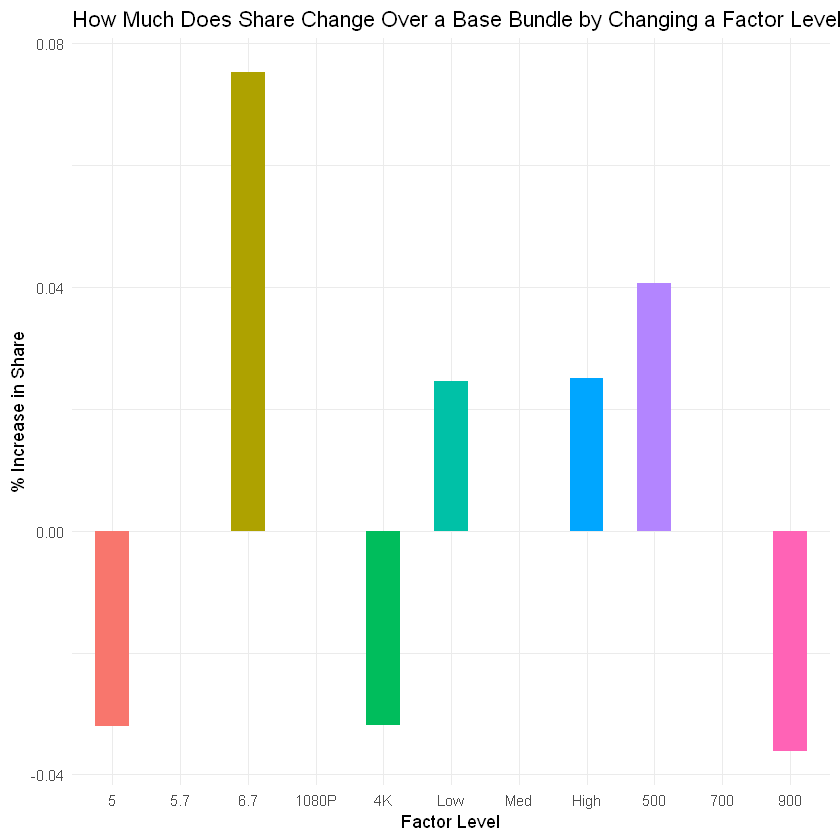

In [132]:
#Sensitity
sensitivity.mnl <- function(model, factor, base.data, competitor.data) {
  #Function for creating data for a share-sensitivity chart
  #model: mlogit object returned by mlogit() function
  #factor: list of vectors with factorute levels to be used in sensitivity
  # base.data: data frame containing baseline design of target product
  # competitor.data: data frame containing design of competitive set
  data <- rbind(base.data, competitor.data)
  base.share <- predict.mnl(model, data)[1,1]
  share <- NULL
  for (a in seq_along(factor)) {
    for (i in factor[[a]]) {
      data[1,] <- base.data
      data[1,a] <- i
      share <- c(share, predict.mnl(model, data)[1,1])
    }
  }
  data.frame(level=unlist(factor), share=share, increase=share-base.share)
}

base.data <- expand.grid(factor)[c(26), ]
competitor.data <- expand.grid(factor)[c(1, 3, 41, 49, 22, 33), ]
tradeoff <- sensitivity.mnl(m1, factor, base.data, competitor.data)

#The plot in Fig. 13.2 shows how share would change if we
#changed each of the factorutes of the design, one at a time.

tradeoff$level <- factor(tradeoff$level, levels = c("5", "5.7", "6.7",
                                                    "1080P", "4K", "Low",
                                                    "Med", "High", "500", "700",
                                                    "900"))
                                                    
ggplot(data=tradeoff) + geom_bar(aes(x=level, y =increase, fill = level), stat="identity",
                                 width=0.5) + ylab('% Increase in Share') + xlab('Factor Level') + ggtitle("How Much Does Share Change Over a Base Bundle by Changing a Factor Level?") + theme_minimal() + theme(legend.position="none")

#### Analysis of Market Share Sensitivty Chart
The Base Bundle is a Smartphone with 5.7 inches in size, a 1080P screen, a medium cpu/gpu combo priced at $500 dollars. Increasing the size to 6.7 inches, while keeping all other factors the same would increase market share by nearly 8 percent. On the other hand, boosting the price by 200 dollars to 900 dollars would hurt share by nearly 4%.